In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [4]:
data = np.load('data/mnist_train_small.npy')

In [25]:
X = data[:, 1:]
y = data[:,0]

In [26]:
X.shape, Y.shape

((19999, 784), (19999,))

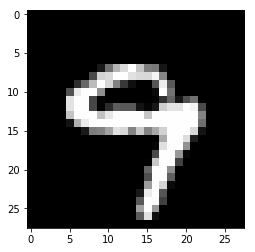

In [27]:
plt.imshow(X[2].reshape(28,28), cmap ='gray')

In [28]:
y[2]

9

In [21]:
a, b = make_blobs(n_samples = 100, centers = 3, random_state = 42)

In [ ]:
plt.scatter( a[:,0], a[:, 1], c =b)

In [ ]:
x[:5], y[:5]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
X_train.shape, y_train.shape
X_test.shape, y_train.shape

((6600, 784), (13399,))

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
#create object of KNN
model = KNeighborsClassifier()

In [41]:
# training of model happens in fit function
# plotting the points on graph
# no work is happening while training KNN model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [43]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

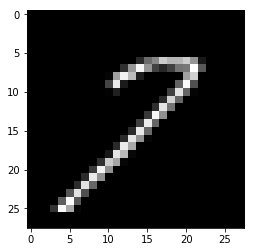

In [44]:
#model says 1st image is 1 but actual image is 7 in x[1]
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray')

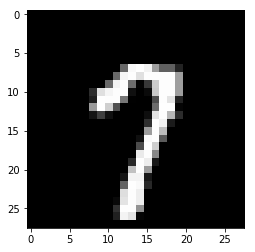

In [45]:
#model says 1st image is 7 and actual image is 7 in x[1]
plt.imshow(X_test[1].reshape(28,28), cmap = 'gray')

In [47]:
#get accuracy score
model.score(X_train[:100], y_train[:100])

0.98

Thus the model is 98% accurate

# Custom KNN

In [48]:
KNeighborsClassifier?

In [130]:
class CustomKNN:
    
    # constructor 
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
    
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() #standardisation
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to
    def predict_point(self, point):
        #list of distances of each point in training data
        list_dist = []
        
        #these points are from training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point)**2).sum()
            #[index, class] == [dist_point, y_point]
            list_dist.append([dist_point, y_point])
           
        ##sorting the list according to the distance 
        # will sort according to the 0th element of inner lists
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking count and unique value of class
        items, count = np.unique(np.array(top_k)[:, 1], return_counts = True)
        #get class with max value
        ans  = items[np.argmax(count)]
        return ans
    
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std()
        for point in X:
            results.append(self.predict_point(point))
            
        return np.array(results, dtype = int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [131]:
m2 = CustomKNN()

In [132]:
m2.fit(X_train, y_train)

In [133]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [134]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [135]:
m2.score(X_test[:200], y_test[:200])

0.93

In [87]:
li = [
    [23,0],
    [41,1],
    [3, 0],
    [10, 1],
    [6, 0],
    [4, 1]
]

In [88]:
sorted_list = sorted(li)

In [90]:
sorted(li, key = lambda x: x[1]) #sort according to 2nd elemnt

[[23, 0], [3, 0], [6, 0], [41, 1], [10, 1], [4, 1]]

In [66]:
top_k = sorted_list[:3] #get top 3 elements from list

In [67]:
top_k

[[3, 0], [4, 1], [6, 0]]

In [70]:
li, counts = np.unique(np.array(top_k)[:, 1], return_counts = True)

In [72]:
li[np.argmax(counts)] #zero is max in top_k and it is at 0th index 

0

In [73]:
sum(np.array([1,2,3,1,1]) == np.array([0,2,3,4,1]))

3